# iris 주성분분석

# 1. 데이터 로드

In [62]:
from sklearn.datasets import load_iris
import copy
iris_raw = load_iris()
iris_ori = iris_raw.copy()
iris_ori.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [71]:
X = iris_ori['data']
y = iris_ori['target']
feature_names = iris_ori['feature_names']

df_X = pd.DataFrame(X)
df_y = pd.DataFrame(y)

# 2. 데이터검증
# 2-1. 종속변수가 몰려있으면 PCA의미없음

<AxesSubplot:xlabel='0'>

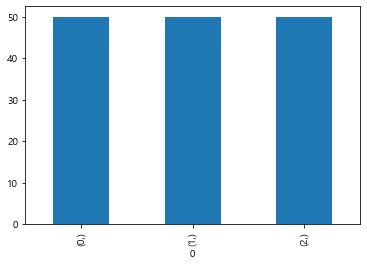

In [70]:
df_y.value_counts().plot(kind='bar') 

# 2-2.독립변수가 min, max양끝으로 이분되어있다면 의미없음

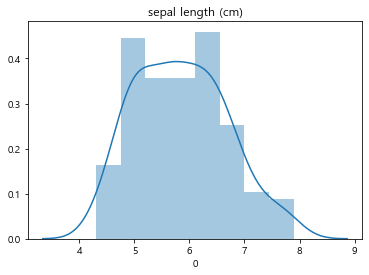

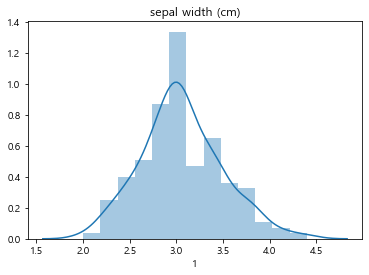

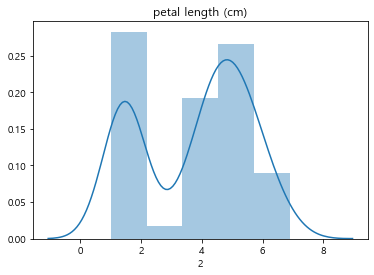

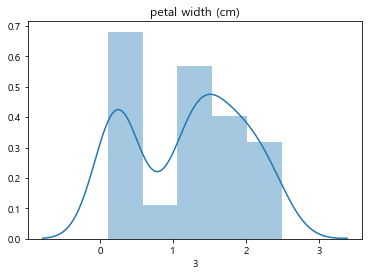

In [124]:
# 폰트
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False
f_path = 'C:\Windows\Fonts\malgun.ttf'
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font',family=font_name)
import seaborn as sns

for i in range(df_X.shape[1]): # 속성4개
    sns.distplot(df_X[i])
    plt.title(feature_names[i])
    plt.show()

-> Target변수는 0,1,2 / Features 들은 적당히 고르게 분포

# 3. 주성분분석(PCA)

### 3-1. transform을 이용해서 PC값들을 쉽게 구할 수 있다.

In [93]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X) # iris의 모든 data
pc_score = pca.transform(X)
pc_score[:5,:] # 5x4


array([[-2.68412563e+00,  3.19397247e-01, -2.79148276e-02,
        -2.26243707e-03],
       [-2.71414169e+00, -1.77001225e-01, -2.10464272e-01,
        -9.90265503e-02],
       [-2.88899057e+00, -1.44949426e-01,  1.79002563e-02,
        -1.99683897e-02],
       [-2.74534286e+00, -3.18298979e-01,  3.15593736e-02,
         7.55758166e-02],
       [-2.72871654e+00,  3.26754513e-01,  9.00792406e-02,
         6.12585926e-02]])

### 3-2. components_를 통해 얻은 eigen_vector(고유벡터)를 볼 수 있다.

In [94]:
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102],
       [-0.58202985,  0.59791083,  0.07623608,  0.54583143],
       [-0.31548719,  0.3197231 ,  0.47983899, -0.75365743]])

### 3-3. explained_variance를 통해 PC값들의 설명 정도를 확인할 수 있다.
- PC값이 클수록 설명력이 높다
- 첫번째 PC값(PC1)이 가장 크므로 설명력이 가장 높은 feature일 것이라 생각가능
- PC3, PC4는 설명력이 상대적으로 낮다고 생각할 수 있음 -> 100%는 아님

In [99]:
ratio = pca.explained_variance_ratio_
ratio

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

,V_ration
PC1,0.924619
PC2,0.053066
PC3,0.017103
PC4,0.005212


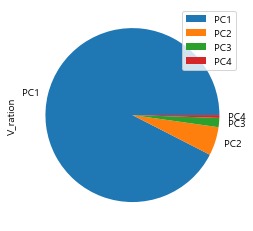

In [135]:
df_v = pd.DataFrame(ratio, index=['PC1','PC2','PC3','PC4'], columns=['V_ration'])
df_v.plot.pie(y='V_ration')
df_v

# 4. 원본 vs PCA에 따른 비교

### 4-1. feature에 따른 iris 분포 확인

In [121]:
pc_score

array([-2.68412563e+00,  3.19397247e-01, -2.79148276e-02, -2.26243707e-03])

Text(0.5, 1.0, 'PCA of IRIS dataset')

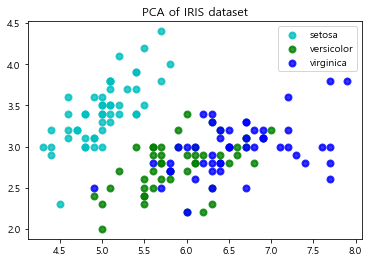

In [107]:
import seaborn as sns
plt.figure()
colors = ['c', 'g', 'b']
lw = 2

for color, i, target_name in zip(colors, [0,1,2] , iris_raw.target_names):
    plt.scatter(X[y == i, 0], X[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

### 4-2. PCA를 통한 분포 확인
- PC1, PC2에 의한 분포

Text(0.5, 1.0, 'PCA of IRIS dataset')

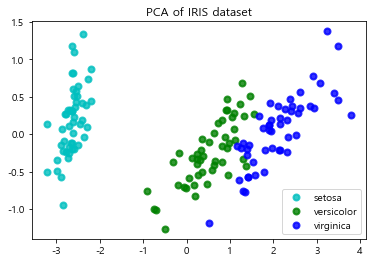

In [123]:
plt.figure()
colors = ['c', 'g', 'b']
lw = 2

for color, i, target_name in zip(colors, [0,1,2] , iris_raw.target_names):
    plt.scatter(pc_score[y == i, 0], pc_score[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

# 5. confusion_maxtrix로 차이 확인 + RogisticRegression
- 모든 feature를 사용했을 때 vs PCA적용한 경우 차이 확인

### 5-1. 모든 feature를 사용한 경우 / 모든 feature를 PCA로 나타낸경우
- 모든 feautre를 사용할 때와 PCA도 모든 feature를 사용한다고 하면, 설명력이 동일하다.
- 하지만, feature의 개수가 줄어들면 차이가 난다

In [129]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

clf = LogisticRegression(max_iter=1000, random_state=0
                        ,multi_class='multinomial')
clf.fit(X, y)
pred = clf.predict(X)
confusion_matrix(y, pred)

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  1, 49]], dtype=int64)

In [131]:
clf.fit(pc_score, y)
pred = clf.predict(pc_score)
confusion_matrix(y, pred)

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  1, 49]], dtype=int64)

### 5-2. feature 2개 / PCA 2개
- PC1이 상당히 많은 설명력을 가지고 있기 때문에 PC1, PC2만으로도 iris 데이터 대부분을 분류 할 수 있다.
- 설명력이 그다지 좋지 못한 feature의 경우는 제외하고 계산하는 것이 연산속도 높아짐

In [132]:
clf = LogisticRegression(max_iter=1000, random_state=0, 
                        multi_class='multinomial')
clf.fit(X[:,:2],y)
pred = clf.predict(X[:,:2])
confusion_matrix(y,pred)

array([[50,  0,  0],
       [ 0, 37, 13],
       [ 0, 14, 36]], dtype=int64)

In [133]:
clf2 = LogisticRegression(max_iter=1000, random_state=0, 
                        multi_class='multinomial')
clf2.fit(pc_score[:,:2],y)
pred = clf2.predict(pc_score[:,:2])
confusion_matrix(y,pred)

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  2, 48]], dtype=int64)

# 6.정리
- feature가 많을 떄, PCA를 함으로써 어느정도 성능은 유지하면서 연산속도를 높일 수 있다.